Roll:no:225229106

# PML Lab7: Loan approval classification using SVM


# step:1 [Understand Data]

In [22]:
import pandas as pd
d=pd.read_csv("train_loan.csv")
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
d.shape

(614, 13)

In [25]:
d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
type(d)

pandas.core.frame.DataFrame

In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
d.value_counts()

Loan_ID   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP002990  Female  No       0           Graduate   Yes            4583             0.0                133.0       360.0             0.0             Semiurban      N              1
LP002984  Male    Yes      2           Graduate   No             7583             0.0                187.0       360.0             1.0             Urban          Y              1
LP001664  Male    No       0           Graduate   No             4191             0.0                120.0       360.0             1.0             Rural          Y              1
LP001665  Male    Yes      1           Graduate   No             3125             2583.0             170.0       360.0             1.0             Semiurban      N              1
LP001666  Male    No       0           Graduate   No             8333             3750.0             187.0    

# step:2 [Data Cleaning]

In [29]:
d['Dependents'] = d['Dependents'].replace(to_replace='0', value='true')
d['Dependents'] = d['Dependents'].replace(to_replace='1', value='false')
d['Dependents'] = d['Dependents'].replace(to_replace='2', value='n')
d['Dependents'] = d['Dependents'].replace(to_replace='3+', value='na')
print(d)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No       true      Graduate            No   
1    LP001003    Male     Yes      false      Graduate            No   
2    LP001005    Male     Yes       true      Graduate           Yes   
3    LP001006    Male     Yes       true  Not Graduate            No   
4    LP001008    Male      No       true      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No       true      Graduate            No   
610  LP002979    Male     Yes         na      Graduate            No   
611  LP002983    Male     Yes      false      Graduate            No   
612  LP002984    Male     Yes          n      Graduate            No   
613  LP002990  Female      No       true      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [30]:
d[['Gender','Married','Dependents','Education','Self_Employed','Credit_History']].fillna( method ='ffill', inplace=True)
d


C:\Users\1mscdsa06\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,true,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,true,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,na,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,false,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,n,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
dp=d.drop(['Loan_ID'],axis=1)
dp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,true,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,true,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,na,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,false,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,n,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# step:3 [OPTIONAL : Exploratory Data Analysis-Who got their loan Approved]

In [32]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='Married', ylabel='count'>

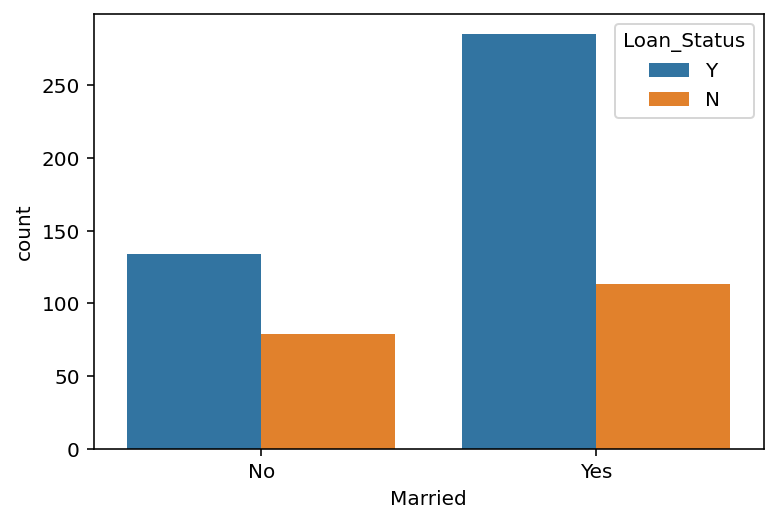

In [33]:
sns.countplot(x="Married", hue="Loan_Status", data=d)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

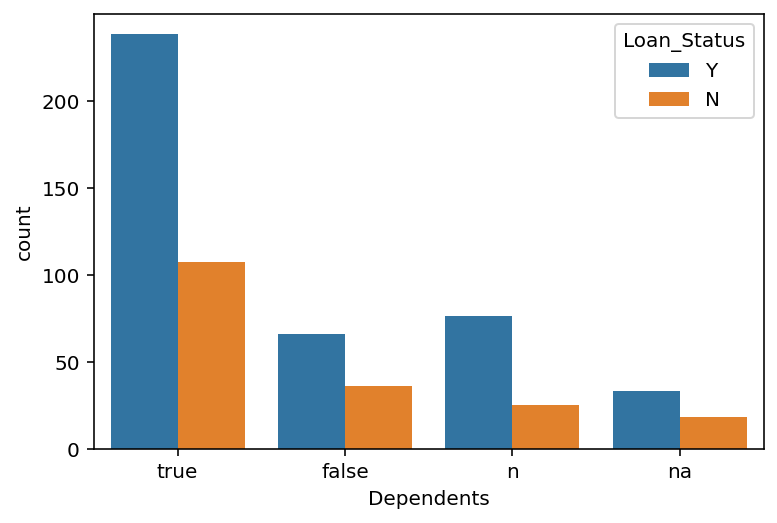

In [34]:
sns.countplot(x="Dependents", hue="Loan_Status", data=d)

<AxesSubplot:xlabel='Education', ylabel='count'>

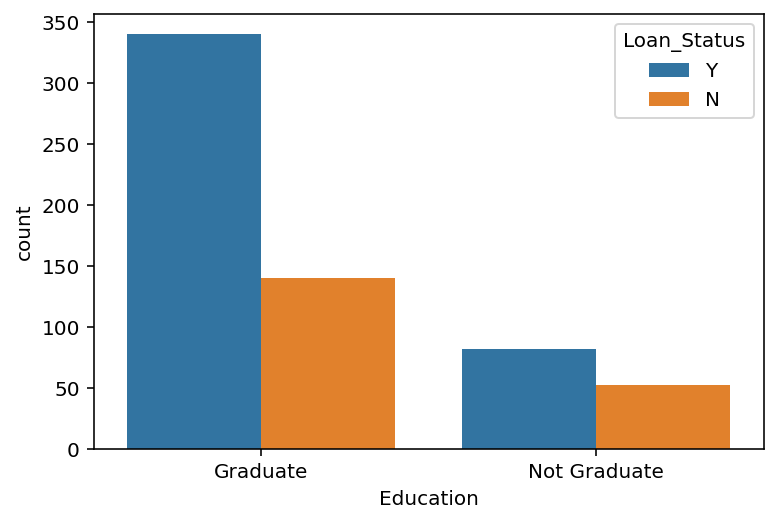

In [35]:
sns.countplot(x="Education", hue="Loan_Status", data=d)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

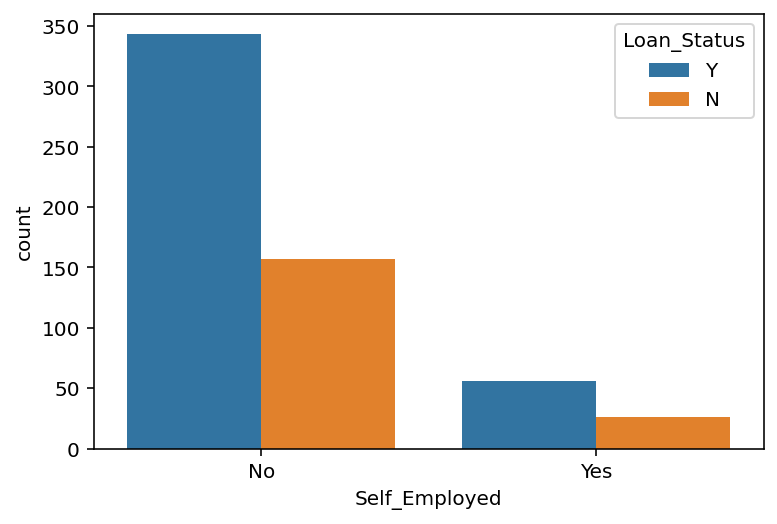

In [36]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data=d)

# step:4 [Extract X and y]

In [37]:
X=d[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']]
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,Male,No,true,Graduate,No,1.0,5849,0.0,NaN,360.0,Urban
1,Male,Yes,false,Graduate,No,1.0,4583,1508.0,128.0,360.0,Rural
2,Male,Yes,true,Graduate,Yes,1.0,3000,0.0,66.0,360.0,Urban
3,Male,Yes,true,Not Graduate,No,1.0,2583,2358.0,120.0,360.0,Urban
4,Male,No,true,Graduate,No,1.0,6000,0.0,141.0,360.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,true,Graduate,No,1.0,2900,0.0,71.0,360.0,Rural
610,Male,Yes,na,Graduate,No,1.0,4106,0.0,40.0,180.0,Rural
611,Male,Yes,false,Graduate,No,1.0,8072,240.0,253.0,360.0,Urban
612,Male,Yes,n,Graduate,No,1.0,7583,0.0,187.0,360.0,Urban


In [38]:
y=d['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# step: 5 [One Hot Encoding]

In [39]:
# perform one hot encoding on the 'Category' variable
one_hot = pd.get_dummies(X)
# add the one hot encoded columns to the original DataFrame
d = pd.concat([d, one_hot], axis=1)
# print the updated DataFrame
print(d)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No       true      Graduate            No   
1    LP001003    Male     Yes      false      Graduate            No   
2    LP001005    Male     Yes       true      Graduate           Yes   
3    LP001006    Male     Yes       true  Not Graduate            No   
4    LP001008    Male      No       true      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No       true      Graduate            No   
610  LP002979    Male     Yes         na      Graduate            No   
611  LP002983    Male     Yes      false      Graduate            No   
612  LP002984    Male     Yes          n      Graduate            No   
613  LP002990  Female      No       true      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  ...  \
0               5849                0.0         NaN      

# step:6 [Model Building]

In [53]:
df=d.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_n,Dependents_na,Dependents_true,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,...,0,0,1,1,0,0,1,0,0,1
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,0,1,0,1,1,0,0,0,1
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,...,0,0,1,1,0,1,0,0,0,1
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,true,Graduate,No,2900,0.0,71.0,360.0,...,0,0,1,1,0,1,0,1,0,0
610,LP002979,Male,Yes,na,Graduate,No,4106,0.0,40.0,180.0,...,0,1,0,1,0,1,0,1,0,0
611,LP002983,Male,Yes,false,Graduate,No,8072,240.0,253.0,360.0,...,0,0,0,1,0,1,0,0,0,1
612,LP002984,Male,Yes,n,Graduate,No,7583,0.0,187.0,360.0,...,1,0,0,1,0,1,0,0,0,1


In [56]:
X1=df[['Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
X1

,Credit_History,Credit_History,ApplicantIncome,ApplicantIncome,CoapplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount,Loan_Amount_Term,Loan_Amount_Term
1,1.0,1.0,4583,4583,1508.0,1508.0,128.0,128.0,360.0,360.0
2,1.0,1.0,3000,3000,0.0,0.0,66.0,66.0,360.0,360.0
3,1.0,1.0,2583,2583,2358.0,2358.0,120.0,120.0,360.0,360.0
4,1.0,1.0,6000,6000,0.0,0.0,141.0,141.0,360.0,360.0
5,1.0,1.0,5417,5417,4196.0,4196.0,267.0,267.0,360.0,360.0
...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,2900,2900,0.0,0.0,71.0,71.0,360.0,360.0
610,1.0,1.0,4106,4106,0.0,0.0,40.0,40.0,180.0,180.0
611,1.0,1.0,8072,8072,240.0,240.0,253.0,253.0,360.0,360.0
612,1.0,1.0,7583,7583,0.0,0.0,187.0,187.0,360.0,360.0


In [57]:
y1=df['Loan_Status']
y1

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [63]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform the training data
X1_train_scaled = scaler.fit_transform(X1_train)
X1_train_scaled

array([[ 0.42607331,  0.42607331, -0.31045664, ..., -0.80993454,
        -2.39757504, -2.39757504],
       [ 0.42607331,  0.42607331, -0.21154837, ..., -0.3702096 ,
         0.28034473,  0.28034473],
       [ 0.42607331,  0.42607331, -0.23405739, ...,  0.17298003,
         0.28034473,  0.28034473],
       ...,
       [ 0.42607331,  0.42607331, -0.3196574 , ..., -0.1762133 ,
         0.28034473,  0.28034473],
       [ 0.42607331,  0.42607331, -0.25048734, ...,  0.23764546,
         0.28034473,  0.28034473],
       [ 0.42607331,  0.42607331, -0.34430232, ..., -0.71940293,
         0.28034473,  0.28034473]])

In [65]:
X1_test_scaled = scaler.transform(X1_test)
X1_test_scaled

array([[ 4.26073305e-01,  4.26073305e-01, -3.51367197e-01,
        -3.51367197e-01,  6.65654599e-02,  6.65654599e-02,
        -8.09934539e-01, -8.09934539e-01,  2.80344726e-01,
         2.80344726e-01],
       [ 4.26073305e-01,  4.26073305e-01,  2.25323852e-01,
         2.25323852e-01, -5.90022350e-01, -5.90022350e-01,
        -1.76213303e-01, -1.76213303e-01,  2.80344726e-01,
         2.80344726e-01],
       [ 4.26073305e-01,  4.26073305e-01, -3.12428229e-01,
        -3.12428229e-01,  1.00310500e+00,  1.00310500e+00,
         1.28522547e+00,  1.28522547e+00,  2.80344726e-01,
         2.80344726e-01],
       [-2.34701397e+00, -2.34701397e+00, -3.96220945e-01,
        -3.96220945e-01,  1.10080299e-02,  1.10080299e-02,
        -5.64205896e-01, -5.64205896e-01,  2.06562457e+00,
         2.06562457e+00],
       [ 4.26073305e-01,  4.26073305e-01, -3.49724203e-01,
        -3.49724203e-01,  1.44129404e-01,  1.44129404e-01,
         5.65822532e-02,  5.65822532e-02,  2.80344726e-01,
         2.

In [68]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# train a linear SVM model
svm = LinearSVC(random_state=42)
svm.fit(X1_train, y1_train)
# make predictions on the testing set
y1_pred = svm.predict(X1_test)

In [69]:
# evaluate the accuracy of the model
accuracy = accuracy_score(y1_test, y1_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9555555555555556


In [70]:
from sklearn.metrics import confusion_matrix
# create confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
# print confusion matrix
print(cm)


[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


In [71]:
from sklearn.metrics import classification_report
# generate classification report
report = classification_report(y1_test, y1_pred)

# print classification report
print(report)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.85      0.92        13
          2       0.87      1.00      0.93        13

avg / total       0.96      0.96      0.96        45



# step:7 [Performance comparision]

In [79]:
from sklearn.linear_model import LogisticRegression
# create a logistic regression model with default hyperparameters
lr_model = LogisticRegression()

# train the logistic regression model on the training data
lr_model.fit(X1_train, y1_train)

# make predictions on the test data using the logistic regression model
lr_y1_pred = lr_model.predict(X1_test)

# calculate the accuracy of the logistic regression model
lr_accuracy = accuracy_score(y1_test, lr_y1_pred)
print('Logistic regression accuracy:', lr_accuracy)

# print the classification report for the logistic regression model
print('Logistic regression classification report:')
print(classification_report(y1_test, lr_y1_pred))
from sklearn.linear_model import SGDClassifier
# create a SGDClassifier model with default hyperparameters
sgd_model = SGDClassifier()

# train the SGDClassifier model on the training data
sgd_model.fit(X1_train, y1_train)

# make predictions on the test data using the SGDClassifier model
sgd_y1_pred = sgd_model.predict(X1_test)

# calculate the accuracy of the SGDClassifier model
sgd_accuracy = accuracy_score(y1_test, sgd_y1_pred)
print('SGDClassifier accuracy:', sgd_accuracy)

# print the classification report for the SGDClassifier model
print('SGDClassifier classification report:')
print(classification_report(y1_test, sgd_y1_pred))


Logistic regression accuracy: 0.9111111111111111
Logistic regression classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.69      0.82        13
          2       0.76      1.00      0.87        13

avg / total       0.93      0.91      0.91        45

SGDClassifier accuracy: 0.8222222222222222
SGDClassifier classification report:
             precision    recall  f1-score   support

          0       0.79      1.00      0.88        19
          1       1.00      0.38      0.56        13
          2       0.81      1.00      0.90        13

avg / total       0.86      0.82      0.79        45



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [82]:
from sklearn.linear_model import LogisticRegression
# create a logistic regression model with default hyperparameters
lr_model = LogisticRegression()

# train the logistic regression model on the training data
lr_model.fit(X1_train, y1_train)

# make predictions on the test data using the logistic regression model
lr_y1_pred = lr_model.predict(X1_test)

# calculate the accuracy of the logistic regression model
lr_accuracy = accuracy_score(y1_test, lr_y1_pred)
print('Logistic regression accuracy:', lr_accuracy)

# print the classification report for the logistic regression model
print('Logistic regression classification report:')
print(classification_report(y1_test, lr_y1_pred))
from sklearn.linear_model import SGDClassifier
# create a SGDClassifier model with default hyperparameters
sgd_model = SGDClassifier()

# train the SGDClassifier model on the training data
sgd_model.fit(X1_train, y1_train)

# make predictions on the test data using the SGDClassifier model
sgd_y1_pred = sgd_model.predict(X1_test)

# calculate the accuracy of the SGDClassifier model
sgd_accuracy = accuracy_score(y1_test, sgd_y1_pred)
print('SGDClassifier accuracy:', sgd_accuracy)

# print the classification report for the SGDClassifier model
print('SGDClassifier classification report:')
print(classification_report(y1_test, sgd_y1_pred))


Logistic regression accuracy: 0.9111111111111111
Logistic regression classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.69      0.82        13
          2       0.76      1.00      0.87        13

avg / total       0.93      0.91      0.91        45

SGDClassifier accuracy: 0.7555555555555555
SGDClassifier classification report:
             precision    recall  f1-score   support

          0       0.63      1.00      0.78        19
          1       1.00      0.23      0.38        13
          2       1.00      0.92      0.96        13

avg / total       0.85      0.76      0.71        45



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some synthetic data
X, y= make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train and evaluate a LinearSVC model
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X1_train, y1_train)
linear_svc_score = linear_svc.score(X1_test, y1_test)
print(f"LinearSVC score: {linear_svc_score:.3f}")

# Train and evaluate an SVC model with a linear kernel
svc_linear = SVC(kernel="linear", random_state=42)
svc_linear.fit(X1_train, y1_train)
svc_linear_score = svc_linear.score(X1_test, y1_test)
print(f"SVC with linear kernel score: {svc_linear_score:.3f}")

# Train and evaluate an SVC model with a polynomial kernel
svc_poly = SVC(kernel="poly", degree=3, random_state=42)
svc_poly.fit(X1_train, y1_train)
svc_poly_score = svc_poly.score(X1_test, y1_test)
print(f"SVC with polynomial kernel score: {svc_poly_score:.3f}")

# Train and evaluate an SVC model with an RBF kernel
svc_rbf = SVC(kernel="rbf", gamma=0.1, random_state=42)
svc_rbf.fit(X1_train, y1_train)
svc_rbf_score = svc_rbf.score(X1_test, y1_test)
print(f"SVC with RBF kernel score: {svc_rbf_score:.3f}")

# Train and evaluate an SVC model with a sigmoid kernel
svc_sigmoid = SVC(kernel="sigmoid", random_state=42)
svc_sigmoid.fit(X1_train, y1_train)
svc_sigmoid_score = svc_sigmoid.score(X1_test, y1_test)
print(f"SVC with sigmoid kernel score: {svc_sigmoid_score:.3f}")